In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
import math
import sys
basedir   = "/home/daniel/ORDENAR/UNTDF/SistemasComplejos/Bioimpedancia/EITdF"
sourcedir = basedir+'/source'
sys.path.append(sourcedir)
import GREITdF


In [2]:
envi = GREITdF.EnvironOpt(basedir)
print(envi.bindir)

print(envi.modelsdir)

/home/daniel/ORDENAR/UNTDF/SistemasComplejos/Bioimpedancia/EITdF/source/python
/home/daniel/ORDENAR/UNTDF/SistemasComplejos/Bioimpedancia/EITdF/models


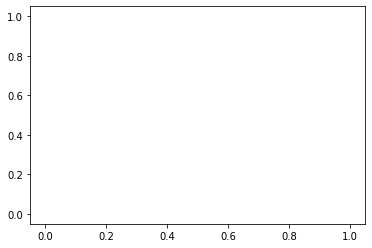

In [3]:
#datitos = GREITdF.EITdata(envi,"simuresp_allelec_snr500.mat")
datitos = GREITdF.EITdata(envi,"simuresp_mistery_nomeas.mat",0)
#datitos = GREITdF.EITdata(envi,"simuresp_ztest.mat",1)
#datitos = GREITdF.EITdata(envi,"simuresp_mistery_meas.mat",1)
datitos.get_normalized_dataframes(2)
#print(datitos.EIT_data_meas_active_electrodes)
plt.plot([abs(x) for x in datitos.EIT_data_meas_active_electrodes])

In [4]:
recmodel = GREITdF.ReconstructionModel("male_16el_01",0.02,envi)

(629, 208)
(208, 49)
(629, 49)
29


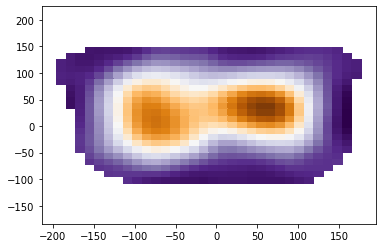

In [8]:
recmodel.set_hyperparameter(0.005)
print(np.shape(recmodel.rm))
print(np.shape(datitos.EIT_normalized_dif))
estaimagen = GREITdF.RawImage(recmodel,datitos)
estaimagen.CalcRawImage(estaimagen.GetRefFrame())
print(np.shape(estaimagen.RawImage))
print(estaimagen.eitdata.ref_frame)
estaimagen.ShowFrame(15)

In [6]:
datitos.estimate_contact_resistances([0.001 for k in range(16*datitos.NrFrames)])
print(datitos.contact_resistances)

ERROR: Contact resistances cannot be estimated. No data on active electrodes.


AttributeError: 'EITdata' object has no attribute 'contact_resistances'

In [ ]:
plt.plot([datitos.contact_resistances[k] for k in range(16)])

In [ ]:
A = [k for k in range(10)]
B = [m**2 for m in range(10)]
coso = A*B